### Import necessary libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [24]:
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42
)
print("Dependent Variables: \n", X)
print("\n\nIndependent Variable: \n", y)

Dependent Variables: 
 [[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]
 [-0.80804463  1.19664076]
 [-0.27062383 -2.25553963]
 [ 0.480502    0.54914434]
 [-1.20757158 -1.26898369]
 [ 0.25415746 -1.79532002]
 [ 2.59123946  0.24472415]
 [ 0.07123641  0.49429823]
 [-1.17762637 -1.20592943]
 [ 0.93343952  0.68811892]
 [ 1.65214494 -0.35885569]
 [-1.40735658 -1.56826626]
 [ 1.02255619 -1.08324727]
 [-0.81680628 -0.6795874 ]
 [ 1.50575249 -0.38919817]
 [-2.17105282 -0.04862909]
 [ 0.71479373 -1.42922002]
 [-0.15013844 -0.11708689]
 [-1.4117586  -1.5332749 ]
 [-2.58590856 -0.40925706]
 [ 0.82600732 -1.05383855]
 [-0.07133524  0.08896214]
 [ 0.6273745  -1.32933233]
 [ 1.65882246 -0.43131517]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-0.05319823  1.85605469]
 [-2.05832072 -2.52343407]
 [-2.02632079  0.06194498]
 [-1.65830375 -1.57127256]
 [ 1.28008347  1.28938375]
 [ 0.96423311  0.55600276]
 [-1.

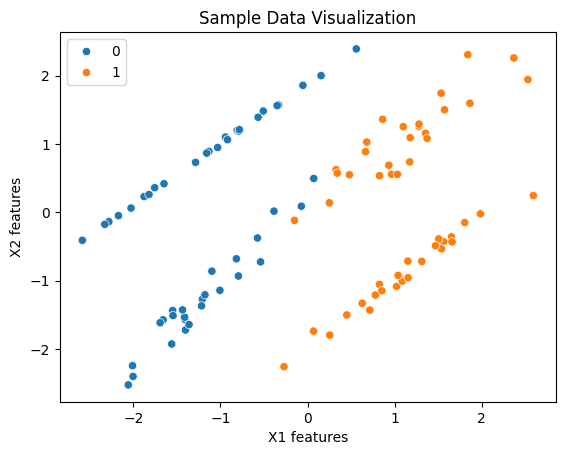

In [25]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.title('Sample Data Visualization')
plt.xlabel("X1 features")
plt.ylabel("X2 features")
plt.legend()

In [28]:
X_with_intercept = sm.add_constant(X)

In [35]:
import warnings

warnings.filterwarnings("ignore")
model = sm.GLM(y, X_with_intercept, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 24 Jan 2025   Deviance:                   5.2422e-09
Time:                        08:55:31   Pearson chi2:                 2.62e-09
No. Iterations:                    29   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.8114   6.37e+04      0.002      0.9

In [34]:
coef = result.params
intercept = coef[0]  # Intercept
slope1 = coef[1]  # Coefficient for X1
slope2 = coef[2]  # Coefficient for X2
print("M1: ", slope1, "M2: ", slope2, "c: ", intercept)

M1:  1040.950623893459 M2:  -597.9335529011405 c:  106.81135280507287


<Axes: title={'center': 'Logistic Regression Decision Boundary (Statsmodels)'}, xlabel='Feature 1', ylabel='Feature 2'>

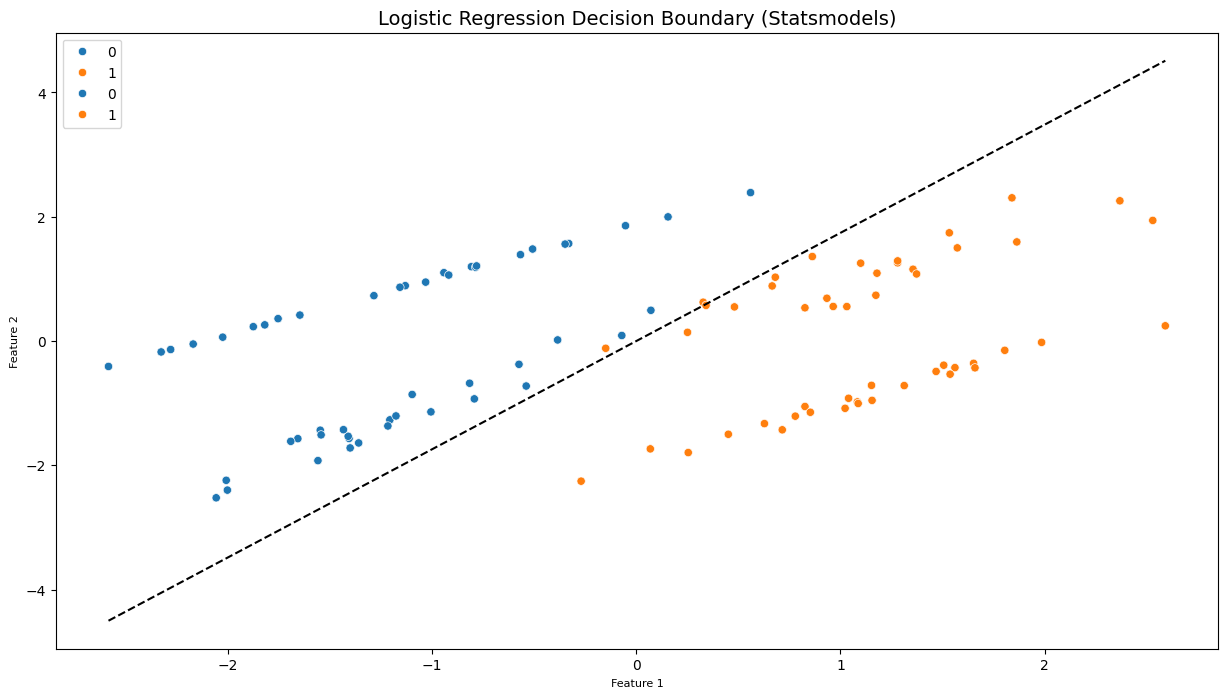

In [44]:
s_x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
s_y_vals = (
    -(slope1 * s_x_vals + intercept) / slope2
)  # Solve for X2 in terms of X1 and coefficients
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.plot(s_x_vals, s_y_vals, color="black", linestyle="--")
plt.title("Logistic Regression Decision Boundary (Statsmodels)", fontsize=14)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [38]:
model = LogisticRegression().fit(X,y)
model

LogisticRegression()

In [43]:
print(model.intercept_,model.coef_)

[0.05126339] [[ 3.23216767 -0.84594518]]


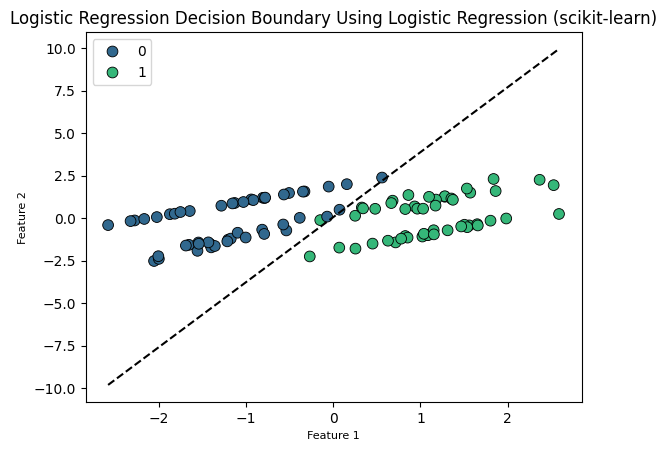

In [40]:
coef = model.coef_[0]
intercept = model.intercept_

# Decision boundary line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", edgecolor="k", s=60)
plt.plot(x_vals, y_vals, color="black", linestyle="--")
plt.title(
    "Logistic Regression Decision Boundary Using Logistic Regression (scikit-learn)"
)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
plt.show()